# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [3]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [38]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split
y = pd_df['domgross'].copy(deep=True)
X = pd_df.drop('domgross', axis=1).copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit a regression model to the training data and look at the coefficients

In [85]:
X_train.shape

(24, 4)

In [86]:
X_test.shape

(6, 4)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(X_train, y_train)
mse = mean_squared_error(y_train, reg.predict(X_train))
r2 = r2_score(y_train, reg.predict(X_train))
print(mse)
print(r2)

0.03252231397796559
0.5149365788031657


In [44]:
reg.coef_

array([ 0.76116213, -0.00516088,  0.12963233,  0.22338636])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The vertical distances between the points and the lines are the errors.

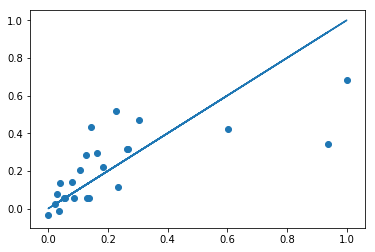

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred_train = reg.predict(X_train)
plt.plot(y_train, y_train)
plt.scatter(y_train, y_pred_train)
plt.show();

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

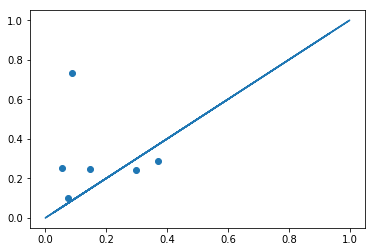

In [54]:
y_pred_test = reg.predict(X_test)
plt.plot(y_train, y_train)
plt.scatter(y_test, y_pred_test)
plt.show();

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [55]:
import numpy as np
def bias(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    bias_value = np.mean(y_hat - y)
    return bias_value

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [56]:
def variance(y_hat):
    y_hat = np.array(y_hat)
    variance_value = np.mean(y_hat**2) - (np.mean(y_hat)**2)
    return variance_value

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [63]:
# code for train set bias and variance

# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085
train_bias = bias(y_train, y_pred_train)
train_variance = variance(y_pred_train)

print(f"Bias: {train_bias}\nVariance: {train_variance}")

Bias: 6.938893903907228e-18
Variance: 0.03452523600574744


In [62]:
# code for test set bias and variance

# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783
test_bias = bias(y_test, y_pred_test)
test_variance = variance(y_pred_test)

print(f"Bias: {test_bias}\nVariance: {test_variance}")

Bias: 0.13862369949919642
Variance: 0.039254308823161346


## Describe in words what these numbers can tell you.

In [ ]:
# The Bias increases when we run our model on the test data because we are 
# overfitted to the test data (and therefore have lower bias).

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
linreg = LinearRegression()
linreg.fit(X=X_train_poly, y=y_train)
print(X_train_poly.shape)
print(X_test_poly.shape)

(24, 35)
(6, 35)


## Plot your overfitted model's training predictions against the actual data

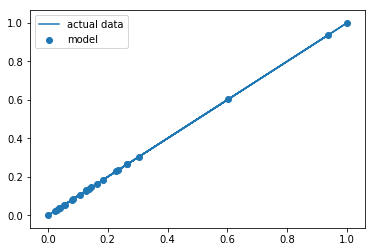

In [91]:
# your code here
plt.scatter(y_train, linreg.predict(X_train_poly), label='model')
plt.plot(y_train, y_train, label='actual data')
plt.legend();

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [95]:
y_pred_train_poly = linreg.predict(X_train_poly)
# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222
train_bias_poly = bias(y_train, y_pred_train_poly)
train_variance_poly = variance(y_pred_train_poly)

print(f"Bias: {train_bias_poly}\nVariance: {train_variance_poly}")

Bias: -3.7730235602495554e-16
Variance: 0.06704754998371244


## Plot your overfitted model's test predictions against the actual data.

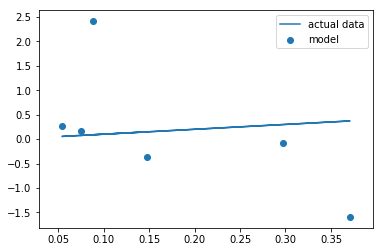

In [104]:
y_pred_test_poly = linreg.predict(X_test_poly)
plt.scatter(y_test, y_pred_test_poly, label="model")
plt.plot(y_test, y_test, label='actual data')
plt.legend()
plt.show();

##  Calculate the bias and variance for the test set.

In [105]:
# your code here
y_pred_test_poly = linreg.predict(X_test_poly)
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582
test_bias_poly = bias(y_test, y_pred_test_poly)
test_variance_poly = variance(y_pred_test_poly)

print(f"Bias: {test_bias_poly}\nVariance: {test_variance_poly}")


Bias: -0.03978580366102268
Variance: 1.4248048918466043


## Describe what you notice about the bias and variance statistics for your overfit model

In [ ]:
# The bias and the variance both increased drastically for the test set
# indicating that this model is overfit

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 